In [1]:
# UCLAx Machine Learning with Python
# Working with GloVe Embeddings
# Typically, embeddings are generated using neural networks and embedding layers. However,
# GloVE embeddings remain a useful open source tool to explore relationships among words in large language databases
# and creating features for NLP tasks that can be used with simpler machine learning algorithms.

# Install required libraries
#!pip install numpy matplotlib sklearn

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def load_glove_embeddings(path):
    embeddings_dict = {}
    with open(path, 'r', encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    return embeddings_dict

def plot_analogy_with_pca(words, embeddings):
    vectors = np.array([embeddings[word] for word in words])
    # 2d for plotting
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)
    fig, ax = plt.subplots()
    ax.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
    for word, vector in zip(words, vectors_2d):
        ax.annotate(word, (vector[0], vector[1]))
    plt.show()

# Load GloVe embeddings (adjust the path to your GloVe embeddings file)
embeddings = load_glove_embeddings('/content/glove.6B.200d.txt')




# Visualizing Embeddings

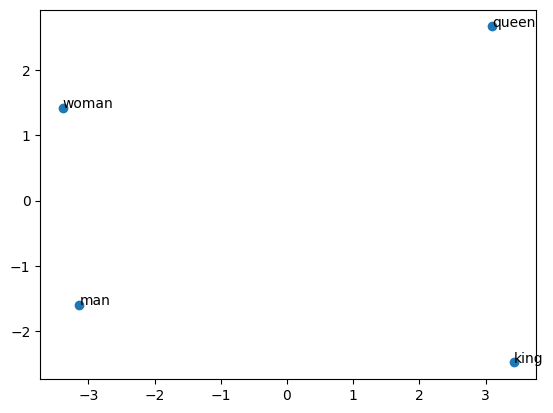

In [2]:
# Example usage
# recreating a classic visualization of embedding spaces. Wer can see
# the relationship between man and woman and gendered words like king and queen (English)
#
words_to_plot = ['king', 'queen', 'man', 'woman']
plot_analogy_with_pca(words_to_plot, embeddings)

# Computing Ana;gies with GloVE Embeddings

Check Data Integrity

In [3]:
[e for e in embeddings.keys() if embeddings[e].shape[0] !=200] # to compute analogies the dimensions must be the same

[]

In [4]:
del embeddings["lighten"]

In [5]:
def find_closest_embeddings(embedding):
    return sorted(embeddings.keys(), key=lambda word: np.linalg.norm(embeddings[word] - embedding))


def analogy(word_a, word_b, word_c):
    a, b, c = embeddings[word_a], embeddings[word_b], embeddings[word_c]
    closest_words = find_closest_embeddings(b - a + c)

    # Assuming the closest word (itself) is not a useful result
    return [word for word in closest_words if word not in [word_a, word_b, word_c]][:5]

# Many of the early ethics and bias concerns were raised when people began investigating these analogies
# It began revealing biases that result from the representation of words in databases, learning to make associations based on
# high co-occurence. In reality, these cases may not relfect our thinking as a society, nor is there any evidence to support a legitimate
# relationship. Essentially, this was an opportunity to put society under the lens, exposing some inherent biases in our everyday language.


# Example analogy: king is to man as queen is to?
print(analogy('king', 'man', 'queen'))

['woman', 'girl', 'teenager', 'she', 'mother']


In [6]:
print(analogy('queen', 'woman', 'king'))

['man', 'another', 'person', 'father', 'who']


In [7]:
print(analogy('dog', 'mammal', 'lizard'))

['reptile', 'reptiles', 'amphibians', 'lizards', 'mammals']


In [8]:
print(analogy('shovel', 'gardening', 'pen'))

['writing', 'inspired', 'devoted', 'cookery', 'popular']
